# 🏡 **Unlocking the Secrets of Mortgages: A Journey into Homeownership and Beyond!**

![Home Image](https://i.ibb.co/DkfZnfD/image.png)

Welcome to the fascinating world of Mortgage Data, where numbers and trends come to life, telling the captivating story of Default Prediction, Customer Segmentation, and Property Purchase Trends. 🚀


## 1 *Project Name : Mortgage Prices Segmentation Analysis*
Author(s)
- Ahmed Abdullah
- Zaeem ul Islam

## 2 *Necessary Libraries*

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import dask.dataframe as dd
import seaborn as sns
import swifter
from scipy.stats import zscore
from scipy import stats
from pandas.plotting import scatter_matrix

## 3 *Loading Dataset & Head Entries*

In [47]:
data = pd.read_csv("dataset.csv", encoding="ISO-8859-1", low_memory=False)

In [48]:
data['Property Value Range'] = data['Property Value Range'].str.replace('$', '', regex=False)

In [49]:
data.head(5)

,First_Name,Last_Name,Address,City,County,State,Zip,Property Type,Phone,Gender,...,Property Purchased Year,Property Built,Property Value Range,Mortgage Amount In Thousands,Lender Name,Interest Type,Loan Type,Loan To Value,Home Value Mortgage File,Email
0,RHONDA,HALFPOP,731 S Mississippi Ave,Mason City,Cerro Gordo,IA,50401,S,6414230703,F,...,0,1976,"150,000 - 174,999",79,BANK OF AMERICA,U,Conventional,51,155335,NaN
1,ROBERT,BIRGE,503 Student Dr,Ogallala,Keith,NE,69153,S,3082849975,M,...,2012,1959,"125,000 - 149,999",143,US BK NATIONAL ASSN,U,Conventional,0,140094,NaN
2,HILARY,DOLAN,429 Moore Dr,Mount Holly,Burlington,NJ,8060,S,6095187632,F,...,2013,1926,"200,000 - 224,999",40,COMMERCE BK,U,Conventional,105,212437,NaN
3,DEBORAH,EMOND,46 Junction Rd,Malone,Franklin,NY,12953,S,5184830320,F,...,0,1920,"75,000 - 99,999",45,NORTH FRANKLIN FCU *OTHER,U,Conventional,52,87210,NaN
4,MARY,EDWARDS,11129 131st St,S Ozone Park,Queens,NY,11420,S,3475316801,F,...,1997,0,"350,000 - 399,999",100,NASSAU EDUCATORS FCU,U,Conventional,27,374555,NaN


## 4 *Data Preprocessing*

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 21 columns):
 #   Column                        Non-Null Count    Dtype 
---  ------                        --------------    ----- 
 0   First_Name                    999996 non-null   object
 1   Last_Name                     999975 non-null   object
 2   Address                       1000000 non-null  object
 3   City                          1000000 non-null  object
 4   County                        1000000 non-null  object
 5   State                         1000000 non-null  object
 6   Zip                           1000000 non-null  int64 
 7   Property Type                 1000000 non-null  object
 8   Phone                         1000000 non-null  object
 9   Gender                        1000000 non-null  object
 10  Age                           1000000 non-null  int64 
 11  Property Purchased Year       1000000 non-null  int64 
 12  Property Built                1000000 non-n

In [51]:
data.describe(include="all")

,First_Name,Last_Name,Address,City,County,State,Zip,Property Type,Phone,Gender,...,Property Purchased Year,Property Built,Property Value Range,Mortgage Amount In Thousands,Lender Name,Interest Type,Loan Type,Loan To Value,Home Value Mortgage File,Email
count,999996,999975,1000000,1000000,1000000,1000000,1000000.000000,1000000,1000000,1000000,...,1000000.000000,1000000.000000,1000000,1000000.000000,1000000,1000000,1000000,1000000.000000,1.000000e+06,90905
unique,55928,204150,980375,11583,1530,51,NaN,3,1000000,3,...,NaN,NaN,20,NaN,41924,4,8,NaN,NaN,90848
top,MICHAEL,SMITH,PO Box 82,Houston,Los Angeles,CA,NaN,S,6414230703,M,...,NaN,NaN,"500,000 - 749,999",NaN,WELLS FARGO BK NA,U,Conventional,NaN,NaN,claramarine@aol.com
freq,17822,7510,16,8580,28601,121430,NaN,951281,1,466009,...,NaN,NaN,86355,NaN,64958,727689,842229,NaN,NaN,2
mean,NaN,NaN,NaN,NaN,NaN,NaN,50353.348007,NaN,NaN,NaN,...,1716.699152,1784.453285,NaN,168.309944,NaN,NaN,NaN,66.596780,3.172268e+05,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,30018.322936,NaN,NaN,NaN,...,701.213214,583.796886,NaN,209.675384,NaN,NaN,NaN,38.756272,3.131883e+05,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1001.000000,NaN,NaN,NaN,...,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,27107.000000,NaN,NaN,NaN,...,1993.000000,1952.000000,NaN,70.000000,NaN,NaN,NaN,42.000000,1.481360e+05,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,46256.000000,NaN,NaN,NaN,...,2003.000000,1977.000000,NaN,128.000000,NaN,NaN,NaN,68.000000,2.345820e+05,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,78247.000000,NaN,NaN,NaN,...,2009.000000,1996.000000,NaN,220.000000,NaN,NaN,NaN,89.000000,3.799022e+05,NaN


### Dropping Unnecessary Data Columns (Name, Phone, Emails)

In [52]:
columns_to_keep = [
    'City', #
    'County', #
    'State', #
    'Property Type', #
    'Gender', #
    'Age', #
    'Property Purchased Year', #
    'Property Built', #
    'Property Value Range', #
    'Mortgage Amount In Thousands', #
    'Lender Name', #
    'Interest Type', #
    'Loan Type', #
    'Loan To Value' # 
]

data = data[columns_to_keep]

In [53]:
memory_usage = data.memory_usage(deep=True).sum()

print(f"Memory usage of the DataFrame: {memory_usage / (1024**2):.2f} MB")

Memory usage of the DataFrame: 591.19 MB


### Updating tuple conventions

In [54]:
data.columns = data.columns.str.strip().str.replace(' ', '_').str.lower()

### Removing Outliers (Z-Score Method)

In [55]:
def drop_outliers_dask(df, z_threshold=3):
    numeric_values = df.apply(pd.to_numeric, errors='coerce')
    z_scores = np.abs(stats.zscore(numeric_values))
    outlier_rows = (z_scores > z_threshold).any(axis=1)
    return df[~outlier_rows]

dask_data = dd.from_pandas(data, npartitions=4)  # You can adjust the number of partitions
dask_data_without_outliers = dask_data.map_partitions(drop_outliers_dask)
data_without_outliers = dask_data_without_outliers.compute()

In [56]:
data=data_without_outliers

## 5 *Data Cleaning*

The majority of essential data is missing in the form of NaN or NULL. In the case of categorical data, this isn't much of a problem since this data is easily replaceable and doesn't significantly affect the model. Most of the categorical and ordinal data are present. The challenge arises with numerical data such as years and values, where 20%-30% of the data is missing. This data is irreplaceable. Other continuous data, such as age and binary gender data, can be replaced. However, this leaves us with two options: either lose 20% of the data or retain it and maintain the overall data distribution.

After removing outiers and unncessary data, we have retained 74% of usable data

**Dropping Duplicates**

In [57]:
data = data.drop_duplicates()

**Removing null 'Cities', 'Counties', 'States'**

In [58]:
data = data.dropna(subset=['city', 'county', 'state'])

**Replacing 'Age' with average buyer age**

In [59]:
avg_age = data.loc[data['age'] >= 18, 'age'].mean()
data['age'] = data['age'].apply(lambda x: avg_age if x < 18 else x)
data['age'] = data['age'].astype(int)

**Replacing 'Gender' with most occuring gender**

In [60]:
mode_gender = data['gender'].mode().iloc[0]
data['gender'] = data['gender'].replace('U', mode_gender)

**Dropping 'Property Type' with Undefined since it is very important variable** 

In [61]:
data = data[data['property_type'] != 'U']

**Dropping 'Build and Puchase Years' with to make data aligned** 

In [62]:
data = data[data['property_purchased_year'] >= 1940]
data = data[data['property_built'] >= 1940]

**Dropping 'Mortgage Price' with Undefined since it is most important variable** 

In [63]:
data = data[(data['mortgage_amount_in_thousands'] > 0)]
data['mortgage_amount_in_thousands'] = data['mortgage_amount_in_thousands'] * 1000

**Dropping 'Loan Type' with Undefined** 

In [64]:
data = data[~data['loan_type'].isin(['W', 'Community Development Authority'])]

**Transforming the range data of 'Property Value Range' from string to two seprate columns**

In [65]:
data['property_value_range'] = data['property_value_range'].str.strip().str.replace(',', '')

In [66]:
data[['low_value_range', 'high_value_range']] = data['property_value_range'].str.split(' - ', expand=True)

data['low_value_range'] = pd.to_numeric(data['low_value_range'], errors='coerce')
data['high_value_range'] = pd.to_numeric(data['high_value_range'], errors='coerce')

data.drop('property_value_range', axis=1, inplace=True)

In [67]:
data = data.dropna(subset=['low_value_range']).copy()
data['low_value_range'] = data['low_value_range'].astype(int)

data = data.dropna(subset=['high_value_range']).copy()
data['high_value_range'] = data['high_value_range'].astype(int)


**Resetting the Indices**

In [68]:
data = data.reset_index(drop=True)

## 6 *Data Distributions (Histograms and Barcharts)*

### Plotting Discrete and Continous Data

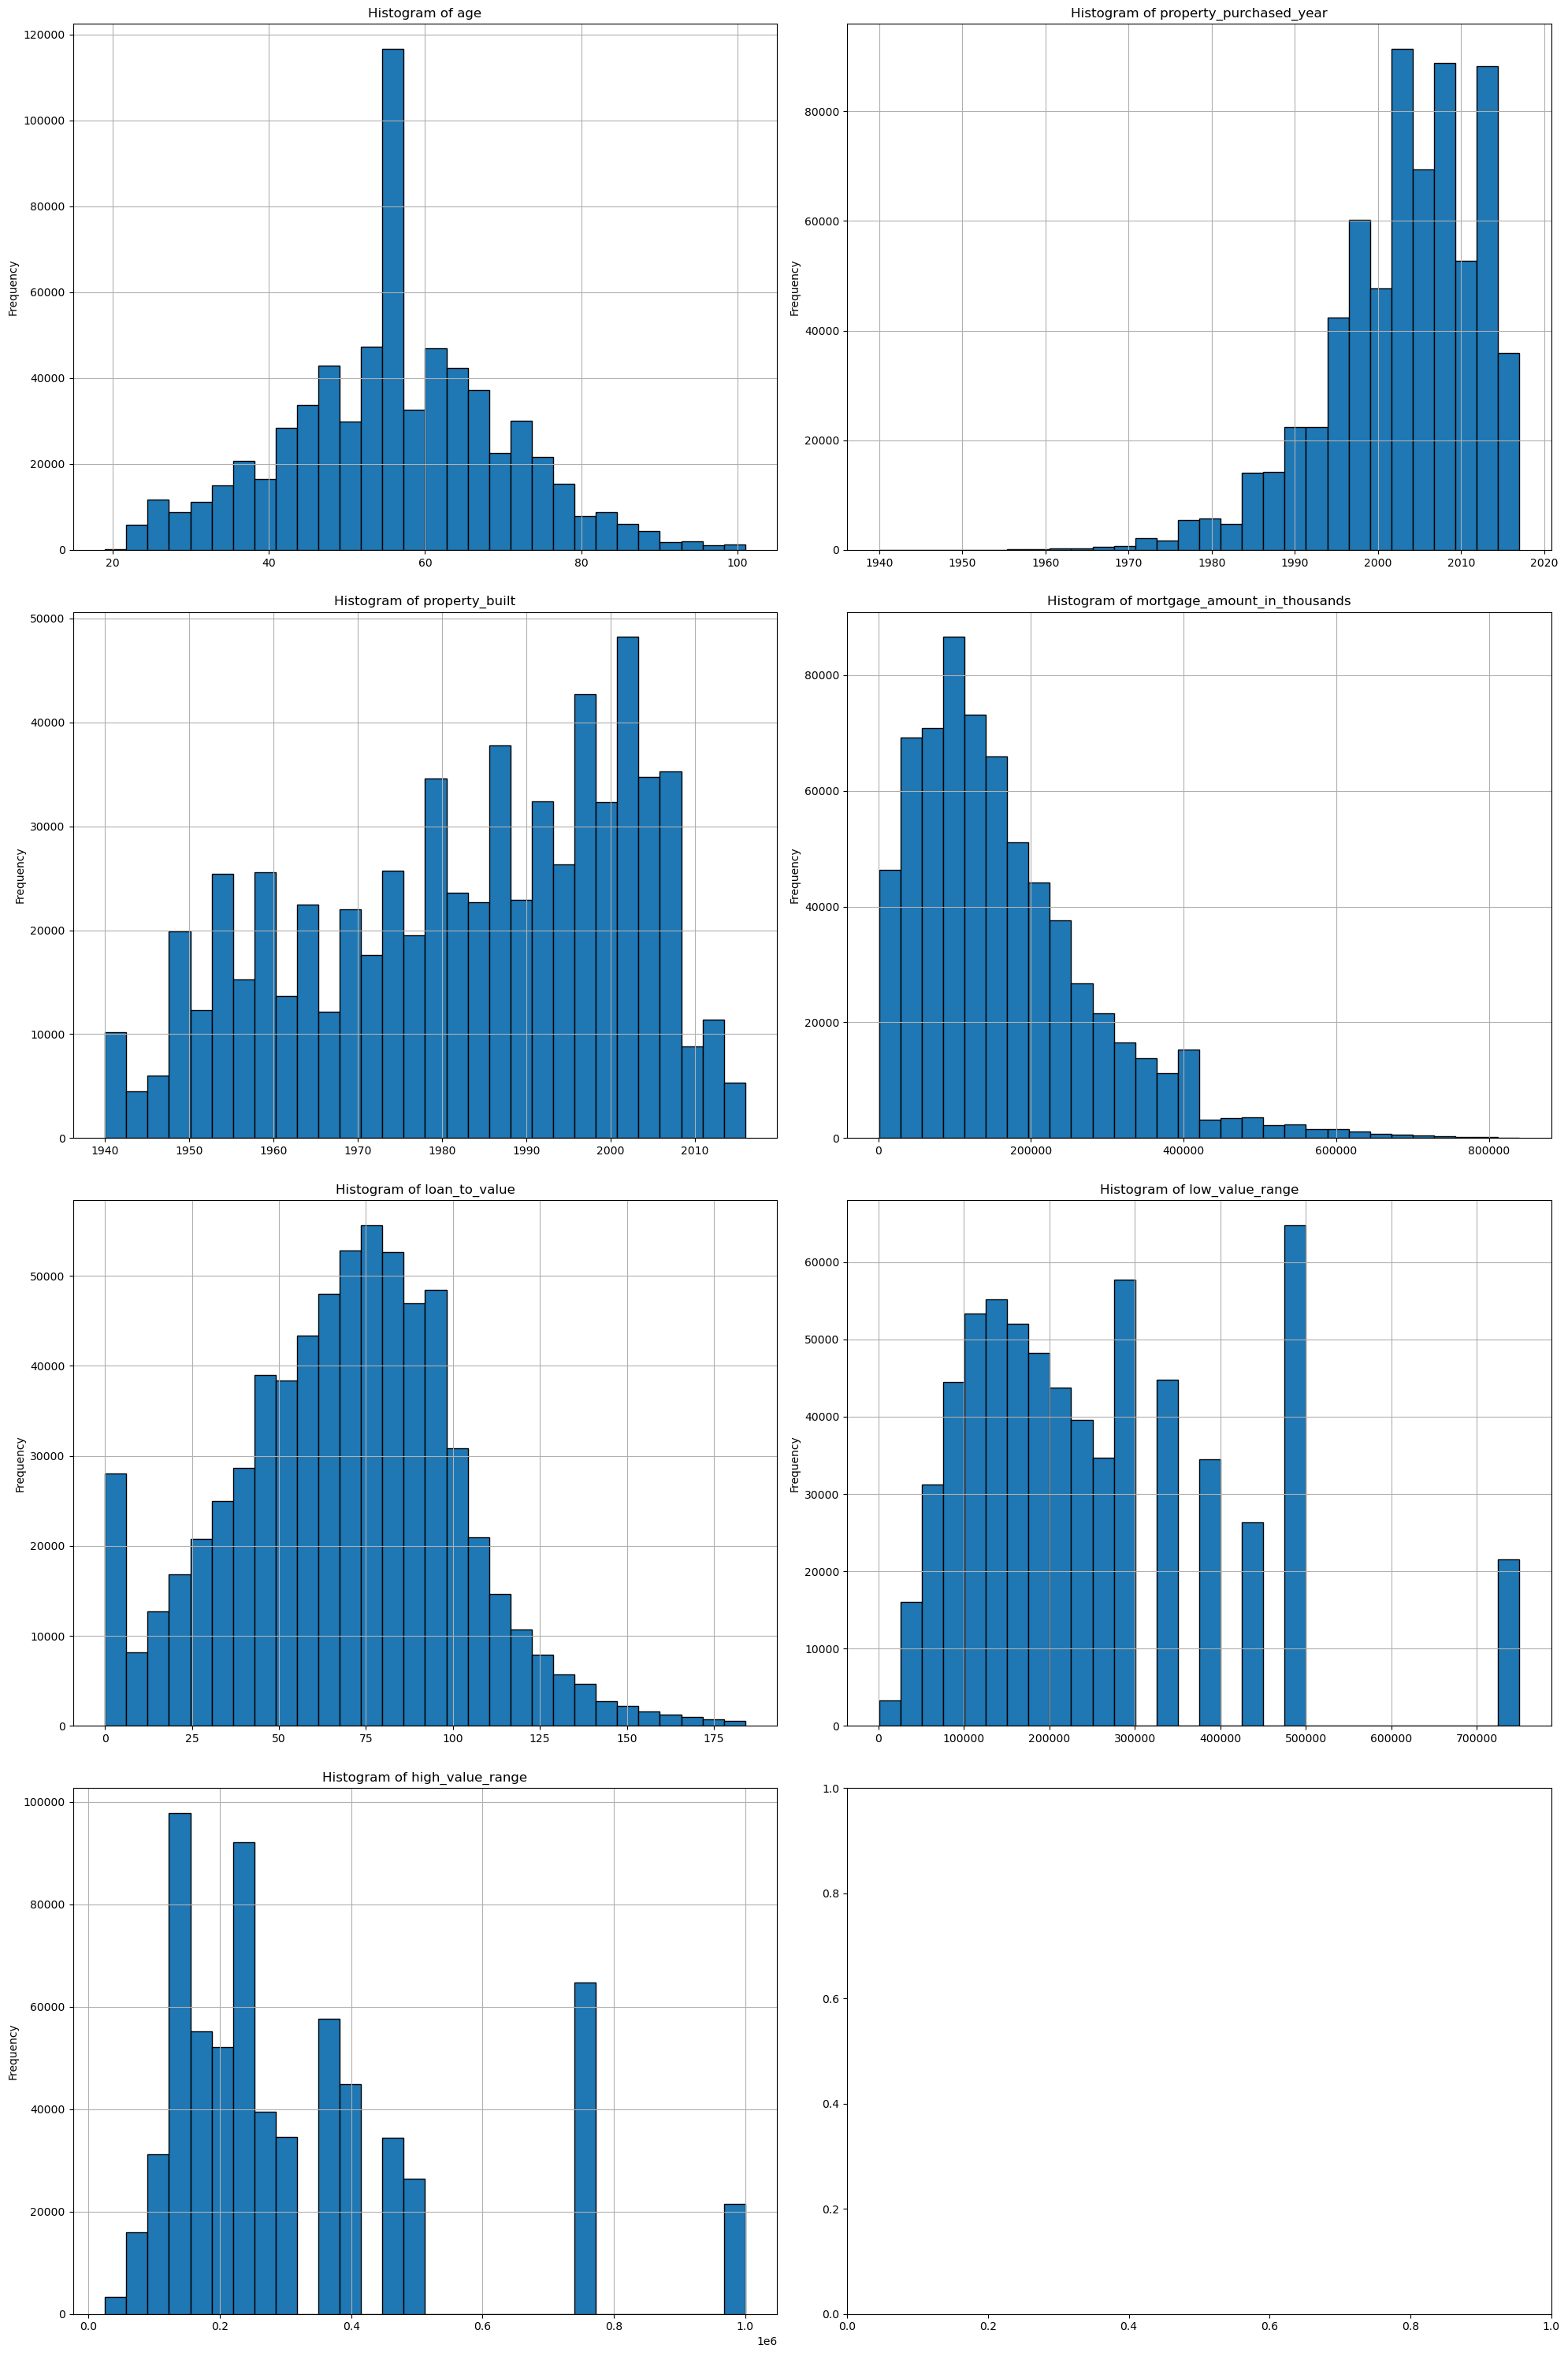

In [69]:
columns_to_keep = [
    'city', 'county', 'state', 'property_type', 'gender', 'age',
    'property_purchased_year', 'property_built',
    'mortgage_amount_in_thousands', 'lender_name', 'interest_type',
    'loan_type', 'loan_to_value', 'low_value_range', 'high_value_range'
]
filtered_data = data[columns_to_keep]

histogram_columns = [
    'age', 'property_purchased_year', 'property_built', 
    'mortgage_amount_in_thousands', 'loan_to_value', 'low_value_range', 
    'high_value_range'
]

num_rows = len(histogram_columns) // 2 + len(histogram_columns) % 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 30))
axes = axes.flatten()

for i, column in enumerate(histogram_columns):
    axes[i].hist(filtered_data[column], bins=30, edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(' ')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)


plt.tight_layout()
plt.show()


### Interpretations of the graphs

- **Age:** Properties are predominantly between 20 and 30 years old, with fewer exceeding 40 years.
- **Year Purchased:** Majority of purchases occurred between 2010 and 2020, with fewer before 2010.
- **Property Built Year:** Most properties were built between 1950 and 1970, fewer before 1950 or after 1970.
- **Mortgage Amount (in thousands):** Majority falls between 100,000 and 300,000, with fewer below 100,000 or above 300,000.
- **Loan-to-Value (LTV) Ratio:** Majority of LTV ratios are between 0.5 and 0.75, indicating a relatively low risk profile.
- **High Value Range:** Majority of Property Value Ranges (High) are between 0.1x10^7 and 0.3x10^7.
- **Low Value Range:** Majority of Property Value Ranges (Low) are between 0.1x10^6 and 0.3x10^6.


### Plotting Categorical and Ordinal Data

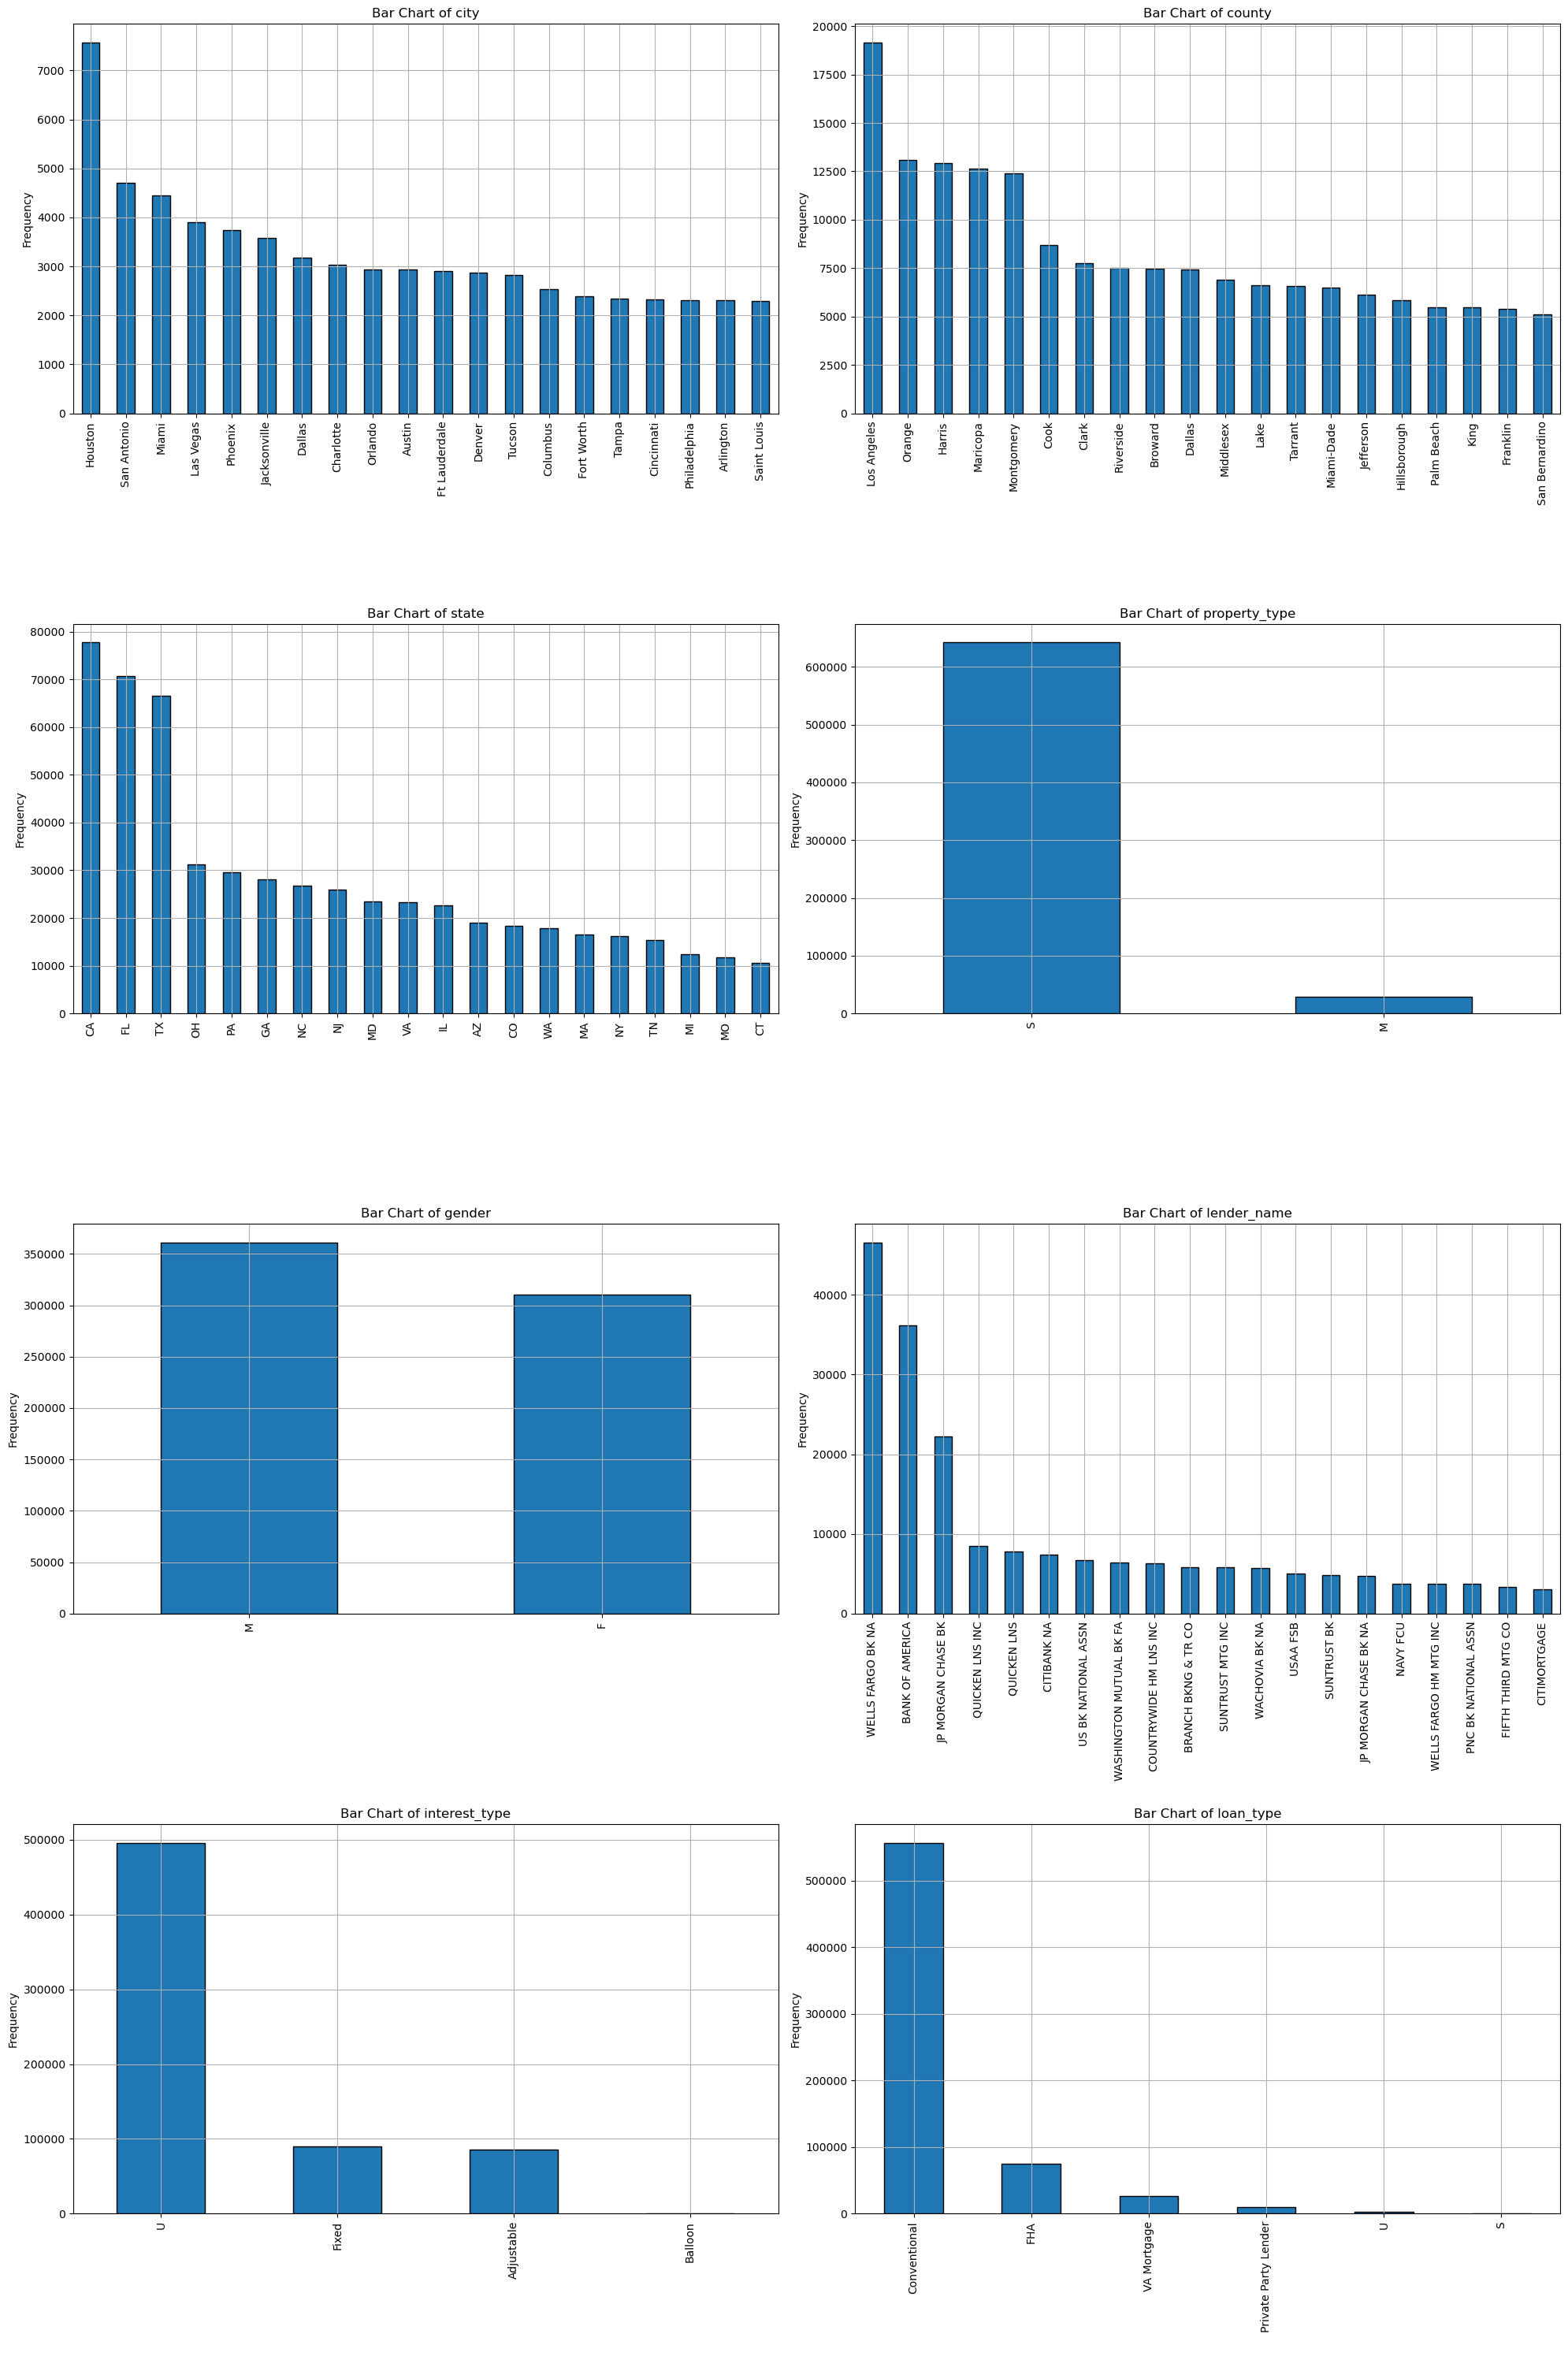

In [70]:
filtered_data = data[columns_to_keep]

bar_chart_columns = [
    'city', 'county', 'state', 'property_type', 'gender',
    'lender_name', 'interest_type', 'loan_type'
]

num_rows = 4
num_cols = len(bar_chart_columns) // num_rows + len(bar_chart_columns) % num_rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 30))
axes = axes.flatten()

sampled_data = filtered_data

for i, column in enumerate(bar_chart_columns):
    top_values = sampled_data[column].value_counts().nlargest(20)
    top_values.plot(kind='bar', ax=axes[i], edgecolor='black')
    axes[i].set_title(f'Bar Chart of {column}')
    axes[i].set_xlabel(' ')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

### Interpretations of the graphs

- **City Distribution:** Cities exhibit an even distribution, reflecting improved data quality; Houston stands out as having the highest number of mortgaged houses.

- **County Insights:** Los Angeles (LA) County is notable for having the highest number of mortgaged houses.

- **State Impact:** California (CA) emerges as the most prominent state in the dataset, housing the highest number of mortgaged properties.

- **Property Type Analysis:** Single-family-owned houses dominate the dataset, while multifamily houses are nearly negligible.

- **Gender Diversity:** Genders are evenly distributed among property owners, indicating a balanced representation.

- **Top Lenders:** Wells Fargo BK NA and Bank of America emerge as the top lenders, contributing to the highest loan approval rates.

- **Interest Type Awareness:** Many property owners are unaware of their interest types, while fixed and balloon interest types are less common.

- **Loan Type Prevalence:** Conventional loans are the most prominent form of financing for mortgaged houses, showcasing their widespread usage.

## 7 *Data Transformation*

### Numerical Data (Z-Score and Min-Max Scalling Data)

In [71]:
data['age'] = (data['age'] - data['age'].mean()) / data['age'].std()
data['loan_to_value'] = (data['loan_to_value'] - data['loan_to_value'].mean()) / data['loan_to_value'].std()

In [72]:
feature = ['property_purchased_year', 'property_built', 'mortgage_amount_in_thousands', 'low_value_range', 'high_value_range']
for f in feature:
    data[f] = (data[f] - data[f].min()) / (data[f].max() - data[f].min())

### String Data (Encoding)

In [73]:
def label_encode(column):
    unique_categories = column.unique()
    encoding_dict = {category: idx for idx, category in enumerate(unique_categories)}
    return column.apply(lambda x: encoding_dict[x])

feature = ['city', 'county', 'state', 'property_type', 'gender', 'lender_name', 'interest_type', 'loan_type']
data[feature] = data[feature].apply(label_encode)

In [74]:
data.head(5)

,city,county,state,property_type,gender,age,property_purchased_year,property_built,mortgage_amount_in_thousands,lender_name,interest_type,loan_type,loan_to_value,low_value_range,high_value_range
0,0,0,0,0,0,-0.802370,0.935065,0.250000,0.169249,0,0,0,-2.129731,0.165554,0.128205
1,1,1,1,0,1,0.274599,0.441558,0.171053,0.046484,1,1,0,2.839050,0.065421,0.051282
2,2,2,2,0,0,-1.233157,0.896104,0.828947,0.210965,2,0,1,0.385715,0.265688,0.205128
3,3,3,1,0,0,1.710557,0.779221,0.486842,0.278903,3,2,0,0.540989,0.666222,0.743590
4,4,4,3,0,1,0.848982,0.974026,0.342105,0.170441,4,0,2,1.037867,0.165554,0.128205


In [31]:
data.to_csv("cleaned_dataset.csv", index=False)

## 8 *Correlation Matrix*

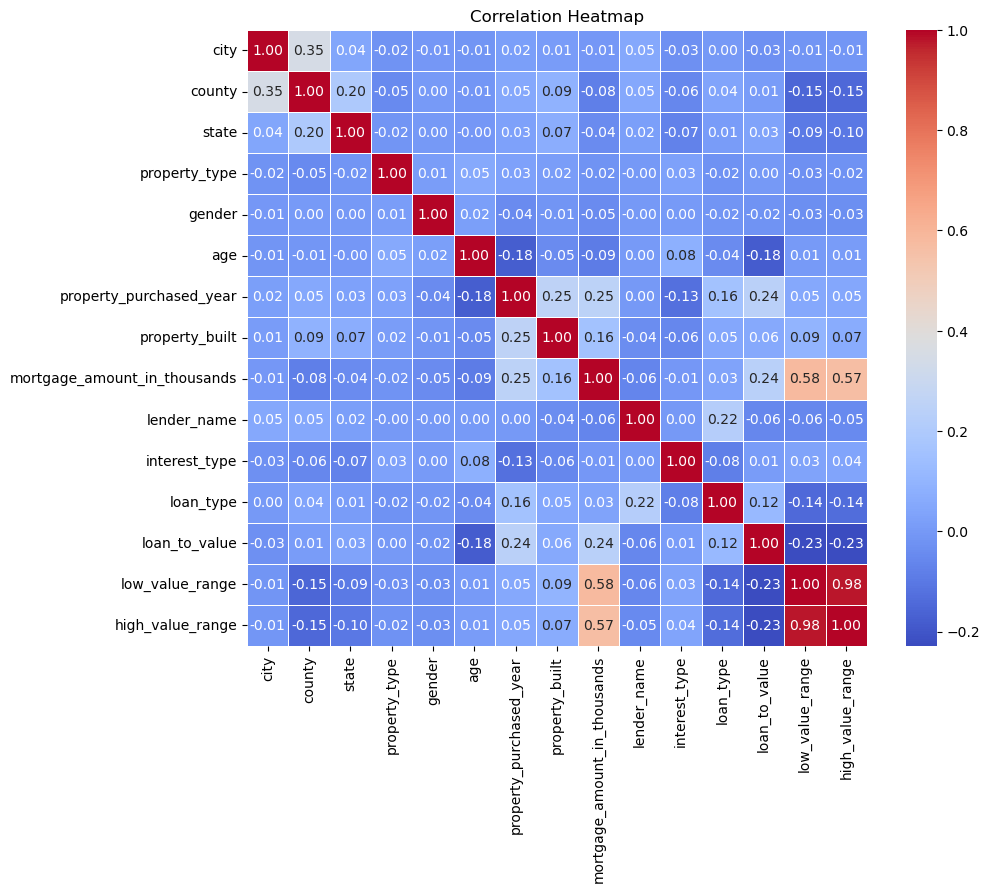

In [76]:
data_corr=data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(data_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Interpretations of the graphs

- Observing the above matrix/heat map, it is clearly evident that the prominent data members on which our Mortgage Amount (y) is dependent are Property Value Range, Loan to Value Ratio, Property Built and Property Purchased Year, it is also clearing that most of the properties in USA are not largely dependent upon the Area, County or State, but the Bank Lenders, Loaned Amount, Property Builts and Property Rate.  